# Boston 주택 가격 예측 딥러닝모델

데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드 (CSV 파일을 로드하거나 sklearn 라이브러리로 대체)
# 데이터 로드 예시 (Kaggle 등에서 데이터를 로드했다고 가정)
# df = pd.read_csv('boston_housing.csv')

# 여기서는 예시로 특성과 타겟을 생성합니다 (df 변수 대체)
# 실제 데이터 로드시에는 df = pd.read_csv('boston_housing.csv') 등으로 대체
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1단계: 입력 데이터의 각 특성의 평균을 뺍니다.
X_train_mean = X_train.mean(axis=0)  # 각 특성의 평균 계산
X_train_centered = X_train - X_train_mean  # 평균을 뺀 데이터

# 2단계: 표준편차로 나눕니다.
X_train_std = X_train.std(axis=0)  # 각 특성의 표준편차 계산
X_train_standardized = X_train_centered / X_train_std  # 표준화된 데이터

# 3단계: 테스트 데이터도 훈련 데이터의 평균 및 표준편차를 사용하여 표준화
X_test_centered = X_test - X_train_mean  # 훈련 데이터 평균 사용
X_test_standardized = X_test_centered / X_train_std  # 훈련 데이터 표준편차 사용

# 결과 확인 (표준화 후의 평균과 표준편차)
train_mean = X_train_standardized.mean(axis=0)  # 표준화 후 평균 (대략 0에 가까워야 함)
train_std = X_train_standardized.std(axis=0)  # 표준화 후 표준편차 (대략 1에 가까워야 함)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [4]:
# 출력 확인
print("훈련 데이터 표준화 후 평균 (각 특성 별):")
print(train_mean)

print("\n훈련 데이터 표준화 후 표준편차 (각 특성 별):")
print(train_std)

훈련 데이터 표준화 후 평균 (각 특성 별):
CRIM      -1.527931e-16
ZN         1.170681e-16
INDUS      3.046930e-15
CHAS      -4.864096e-17
NOX       -5.231102e-15
RM        -4.014391e-15
AGE       -9.926053e-16
DIS       -3.550515e-16
RAD       -3.819827e-17
TAX       -1.542702e-16
PTRATIO    2.001314e-14
B          5.703908e-15
LSTAT     -1.676327e-16
dtype: float64

훈련 데이터 표준화 후 표준편차 (각 특성 별):
CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
dtype: float64


모델 구성 및 컴파일

주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. 
Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성하기.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일

# 1. 딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_standardized.shape[1],)),  # 입력층 + 첫 번째 은닉층
    Dense(64, activation='relu'),  # 두 번째 은닉층
    Dense(1)  # 출력층 (예측을 위한 회귀 레이어)
])

# 2. 모델 컴파일
# 회귀 문제이므로 손실 함수는 'mse'(Mean Squared Error), 평가지표는 'mae'(Mean Absolute Error)로 설정
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

# 모델 요약 출력
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


모델 학습

In [6]:
 import matplotlib.pyplot as plt

# 예측을 위한 딥러닝 모델 학습

# 1. 하이퍼파라미터 설정
epochs = 50  # 학습 반복 횟수
batch_size = 32  # 미니배치 크기

# 2. 모델 학습
history = model.fit(
    X_train_standardized, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_split=0.2,  # 검증 데이터로 20% 사용
    verbose=1  # 학습 과정 출력
)

Epoch 1/50
11/11 [==============================] - 1s 17ms/step - loss: 603.0120 - mae: 22.5710 - val_loss: 522.9457 - val_mae: 21.2374
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 562.5773 - mae: 21.6270 - val_loss: 482.1811 - val_mae: 20.2405
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 513.1083 - mae: 20.4532 - val_loss: 430.5570 - val_mae: 18.9416
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 448.5984 - mae: 18.8567 - val_loss: 362.2151 - val_mae: 17.1216
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 364.5851 - mae: 16.6979 - val_loss: 278.8256 - val_mae: 14.7327
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 267.2644 - mae: 13.8725 - val_loss: 188.4949 - val_mae: 11.6925
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 173.3646 - mae: 10.6499 - val_loss: 111.7842 - val_mae: 8.2882
Epoch 8/50
11/11 [==============================

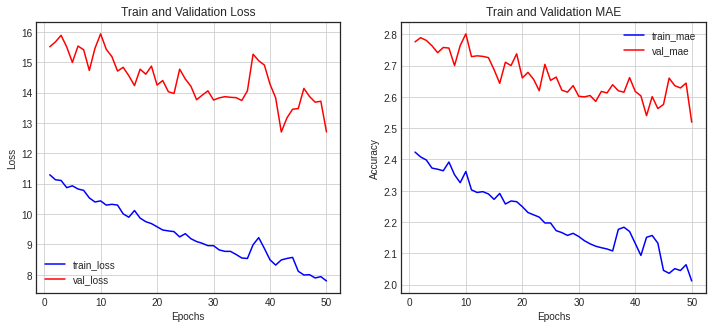

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 평가 지표 시각화 (MAE)

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측

In [10]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

# 1. 테스트 데이터에 대한 예측 및 평가
test_loss, test_mae = model.evaluate(X_test_standardized, y_test, verbose=1)

# 2. 결과 출력
print(f"테스트 데이터에 대한 손실 (MSE): {test_loss:.4f}")
print(f"테스트 데이터에 대한 평균 절대 오차 (MAE): {test_mae:.4f}")


4/4 [==============================] - 0s 2ms/step - loss: 11.3313 - mae: 2.2161
테스트 데이터에 대한 손실 (MSE): 11.3313
테스트 데이터에 대한 평균 절대 오차 (MAE): 2.2161


회고 : 모델 성능 평가

MSE = 11.3313
MSE가 11.3313이라는 것은 제곱 오차의 평균이 11.3313(단위: $1000^2$)이라는 결과이다.
이 값은 직관적이지 않지만, RMSE = 3.3662로 변환할 수 있고 이 결과는 평균 오차가 $3.37임을 의미한다.

MAE = 2.2161
예측 값과 실제 값 간의 오차가 평균적으로 $2.2161 정도라는 결과이다. 
만약 보스턴 주택의 평균 가격이 약 $20,000 ~ $50,000 사이라면, 이 정도의 오차는 약 5~10%의 오차에 해당하므로, 모델이 적절한 성능으로 볼 수 있다. 이 오차는 상대적으로 작지 않지만 허용 가능한 수준이다.
오차가 크다고 판단되면, 모델 구조(뉴런 수, 레이어 수)와 하이퍼파라미터(epoch, batch size, learning rate)를 조정하는 대안이 있다. 여기서 주의할 점은 연구 대상 데이터가 1978년 버전임을 감안해야 한다.

# Reuters 딥러닝 모델

데이터 로드 및 전처리

reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 
데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 
단어의 개수는 10000개로 제한합니다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [12]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

# 1. reuters 데이터셋 로드 (상위 10,000개 단어만 사용)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 2. 훈련 데이터셋을 훈련 데이터와 검증 데이터로 분할 (25%를 검증 데이터로 사용)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 3. 훈련, 검증, 테스트 데이터와 레이블 종류 출력
print(f"훈련 데이터 샘플 수: {len(train_data)}")
print(f"검증 데이터 샘플 수: {len(val_data)}")
print(f"테스트 데이터 샘플 수: {len(test_data)}")
print(f"레이블 종류의 개수: {len(set(train_labels))}")


훈련 데이터 샘플 수: 6736
검증 데이터 샘플 수: 2246
테스트 데이터 샘플 수: 2246
레이블 종류의 개수: 46


In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해 각 데이터셋마다 원-핫 인코딩을 수행합니다.

import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    """각 데이터셋에 대해 원-핫 인코딩을 수행합니다.
    
    Args:
        data (list of lists): 인코딩할 정수 시퀀스 리스트
        dim (int): 원-핫 인코딩 차원 (단어의 개수 제한)
    
    Returns:
        numpy.ndarray: 원-핫 인코딩된 데이터
    """
    results = np.zeros((len(data), dim))  # 모든 샘플에 대해 (샘플 수 x dim) 크기의 0으로 채워진 배열 생성
    for i, sequence in enumerate(data):
        results[i, sequence] = 1  # 해당 단어의 인덱스를 1로 설정
    return results

# 1. 원-핫 인코딩 수행
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 2. 레이블 데이터는 범주형 형태로 변환 (One-Hot Encoding)
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

# 3. 변환 후의 데이터 크기 확인
print(f"훈련 데이터 크기: {x_train.shape}")
print(f"검증 데이터 크기: {x_val.shape}")
print(f"테스트 데이터 크기: {x_test.shape}")
print(f"훈련 레이블 크기: {y_train.shape}")
print(f"검증 레이블 크기: {y_val.shape}")
print(f"테스트 레이블 크기: {y_test.shape}")

훈련 데이터 크기: (6736, 10000)
검증 데이터 크기: (2246, 10000)
테스트 데이터 크기: (2246, 10000)
훈련 레이블 크기: (6736, 46)
검증 레이블 크기: (2246, 46)
테스트 레이블 크기: (2246, 46)


모델 구성 및 컴파일

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 
46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [14]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 1. 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),  # 입력층 + 첫 번째 은닉층 (입력 크기: 10000)
    BatchNormalization(),  # 배치 정규화 적용
    Dropout(0.5),  # 드롭아웃 비율 50%
    
    Dense(64, activation='relu'),  # 두 번째 은닉층
    BatchNormalization(),  # 배치 정규화 적용
    Dropout(0.5),  # 드롭아웃 비율 50%
    
    Dense(46, activation='softmax')  # 출력층 (46개의 카테고리, 다중 분류 문제이므로 softmax 사용)
])

# 2. 모델 컴파일
# 손실 함수: categorical_crossentropy (다중 분류 문제)
# 최적화 알고리즘: Adam (기본 최적화)
# 평가지표: accuracy (정확도)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 3. 모델 구조 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [16]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. 콜백 함수 정의
# ModelCheckpoint: 최상의 검증 정확도를 기록할 때마다 모델을 저장
checkpoint_cb = ModelCheckpoint(
    filepath='best_model.h5',  # 모델이 저장될 경로
    monitor='val_loss',  # 검증 데이터의 손실을 기준으로 모델을 저장
    save_best_only=True,  # 가장 좋은 성능의 모델만 저장
    verbose=1  # 모델 저장 시 출력 메시지를 활성화
)

# EarlyStopping: 검증 손실이 개선되지 않으면 학습 중지
early_stopping_cb = EarlyStopping(
    monitor='val_loss',  # 검증 데이터의 손실을 기준으로 중지
    patience=10,  # 검증 손실이 10 epoch 동안 개선되지 않으면 학습 중지
    restore_best_weights=True,  # 학습 종료 후, 가장 좋은 가중치로 복원
    verbose=1  # 조기 종료 발생 시 메시지 출력
)

# 2. 모델 학습
history = model.fit(
    x_train, 
    y_train, 
    epochs=50,  # 최대 epoch 수
    batch_size=32,  # 배치 크기
    validation_data=(x_val, y_val),  # 검증 데이터
    callbacks=[checkpoint_cb, early_stopping_cb],  # 콜백 함수 적용
    verbose=1  # 학습 과정 출력
)

Epoch 1/50
211/211 [==============================] - 2s 6ms/step - loss: 2.4294 - accuracy: 0.4817 - val_loss: 1.6556 - val_accuracy: 0.7061

Epoch 00001: val_loss improved from inf to 1.65557, saving model to best_model.h5
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 1.4575 - accuracy: 0.6859 - val_loss: 1.1778 - val_accuracy: 0.7484

Epoch 00002: val_loss improved from 1.65557 to 1.17777, saving model to best_model.h5
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 1.1865 - accuracy: 0.7325 - val_loss: 1.0969 - val_accuracy: 0.7685

Epoch 00003: val_loss improved from 1.17777 to 1.09691, saving model to best_model.h5
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.9812 - accuracy: 0.7718 - val_loss: 1.0124 - val_accuracy: 0.7903

Epoch 00004: val_loss improved from 1.09691 to 1.01236, saving model to best_model.h5
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.8598 - accur

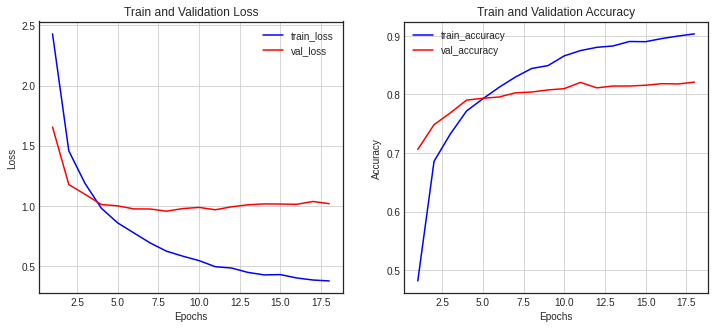

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측

In [18]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

# 1. 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# 2. 평가 결과 출력
print(f"테스트 데이터에 대한 손실 (Loss): {test_loss:.4f}")
print(f"테스트 데이터에 대한 정확도 (Accuracy): {test_accuracy:.4f}")

71/71 [==============================] - 0s 2ms/step - loss: 1.0401 - accuracy: 0.7841
테스트 데이터에 대한 손실 (Loss): 1.0401
테스트 데이터에 대한 정확도 (Accuracy): 0.7841


회고 : 모델 성능 평가

손실 (Loss) = 1.0401
categorical_crossentropy는 예측 확률 분포와 실제 레이블의 원-핫 인코딩 간의 차이를 측정한다.
손실 값이 0에 가까울수록 예측 확률 분포가 실제 레이블에 더 가깝고, 손실 값이 1 이하라면, 모델이 상당히 잘 학습한 것으로 평가할 수 있다.    

정확도 (Accuracy) = 0.7841 (78.41%)
정확도는 예측 값과 실제 레이블이 일치한 비율로, 1에 가까울수록 좋은데,
78.41%의 정확도는 로이터 뉴스 데이터셋의 다중 분류 문제(총 46개의 뉴스 카테고리)에서 꽤 좋은 성능이다.
정확도 78.41%는 랜덤 예측보다 높은 수준으로, 모델이 뉴스를 효과적으로 분류하고 있음을 나타낸다.

결론적으로 손실 1.04, 정확도 78.41%로서 로이터 뉴스 데이터의 46개 클래스를 예측하는 데 있어 양호한 성능으로 평가할 수 있다.
과대적합 없이 훈련, 검증, 테스트 간의 성능이 유사하므로, 모델이 잘 일반화되었다고 평가할 수 있다.

# CIFAR10 딥러닝 모델

데이터 로드 및 전처리

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 
데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 
데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [21]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

# 1. 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 2. 훈련 데이터셋을 훈련 데이터와 검증 데이터로 분할 (20%를 검증 데이터로 사용)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 3. 훈련, 검증, 테스트 데이터와 레이블의 크기 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [22]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

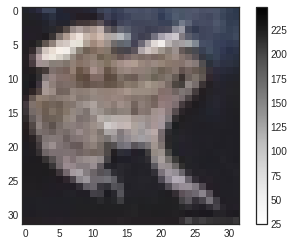

In [23]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [24]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
 
# 1. 데이터 형태 변형 (reshape)
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# 2. 데이터 형태 출력
print("훈련 데이터의 새로운 형태: ", x_train.shape)
print("검증 데이터의 새로운 형태: ", x_val.shape)
print("테스트 데이터의 새로운 형태: ", x_test.shape)


훈련 데이터의 새로운 형태:  (40000, 3072)
검증 데이터의 새로운 형태:  (10000, 3072)
테스트 데이터의 새로운 형태:  (10000, 3072)


In [26]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

모델 구성 및 컴파일

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 
과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [27]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 1. 모델 구성
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),  # 입력층 + 첫 번째 은닉층 (3072개의 입력 뉴런)
    BatchNormalization(),  # 배치 정규화
    Dropout(0.5),  # 드롭아웃 비율 50%
    
    Dense(256, activation='relu'),  # 두 번째 은닉층
    BatchNormalization(),  # 배치 정규화
    Dropout(0.5),  # 드롭아웃 비율 50%
    
    Dense(128, activation='relu'),  # 세 번째 은닉층
    BatchNormalization(),  # 배치 정규화
    Dropout(0.5),  # 드롭아웃 비율 50%
    
    Dense(10, activation='softmax')  # 출력층 (10개의 카테고리, 다중 분류 문제이므로 softmax 사용)
])

# 2. 모델 컴파일
# 손실 함수: categorical_crossentropy (다중 분류 문제)
# 최적화 알고리즘: Adam (기본 최적화)
# 평가지표: accuracy (정확도)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

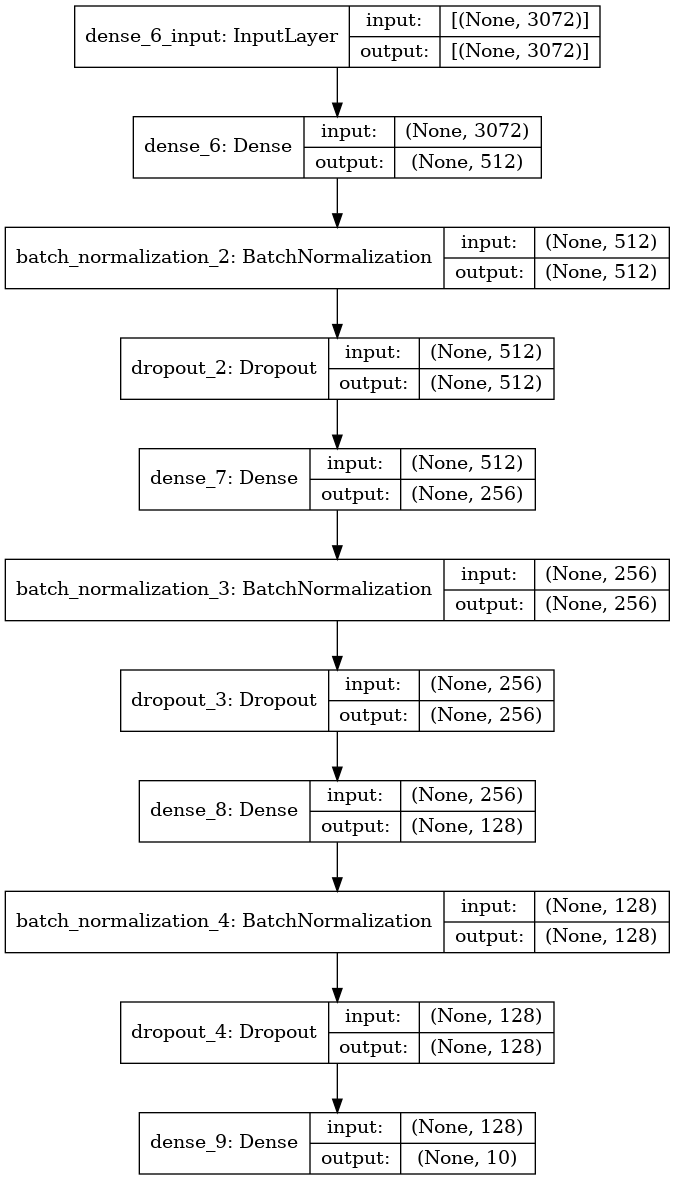

In [29]:
utils.plot_model(model, show_shapes=True)

모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [30]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. 콜백 함수 정의
# ModelCheckpoint: 최상의 검증 정확도를 기록할 때마다 모델을 저장
checkpoint_cb = ModelCheckpoint(
    filepath='best_cifar10_model.h5',  # 모델이 저장될 경로
    monitor='val_loss',  # 검증 데이터의 손실을 기준으로 모델을 저장
    save_best_only=True,  # 가장 좋은 성능의 모델만 저장
    verbose=1  # 모델 저장 시 출력 메시지를 활성화
)

# EarlyStopping: 검증 손실이 개선되지 않으면 학습 중지
early_stopping_cb = EarlyStopping(
    monitor='val_loss',  # 검증 데이터의 손실을 기준으로 중지
    patience=10,  # 검증 손실이 10 epoch 동안 개선되지 않으면 학습 중지
    restore_best_weights=True,  # 학습 종료 후, 가장 좋은 가중치로 복원
    verbose=1  # 조기 종료 발생 시 메시지 출력
)

# 2. 모델 학습
history = model.fit(
    x_train, 
    y_train, 
    epochs=50,  # 최대 epoch 수
    batch_size=32,  # 배치 크기
    validation_data=(x_val, y_val),  # 검증 데이터
    callbacks=[checkpoint_cb, early_stopping_cb],  # 콜백 함수 적용
    verbose=1  # 학습 과정 출력
)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2053 - accuracy: 0.2521 - val_loss: 1.8319 - val_accuracy: 0.3399

Epoch 00001: val_loss improved from inf to 1.83186, saving model to best_cifar10_model.h5
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8956 - accuracy: 0.3131 - val_loss: 1.8274 - val_accuracy: 0.3402

Epoch 00002: val_loss improved from 1.83186 to 1.82737, saving model to best_cifar10_model.h5
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8734 - accuracy: 0.3252 - val_loss: 1.7404 - val_accuracy: 0.3769

Epoch 00003: val_loss improved from 1.82737 to 1.74039, saving model to best_cifar10_model.h5
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8617 - accuracy: 0.3280 - val_loss: 1.8249 - val_accuracy: 0.3533

Epoch 00004: val_loss did not improve from 1.74039
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8719 - accura

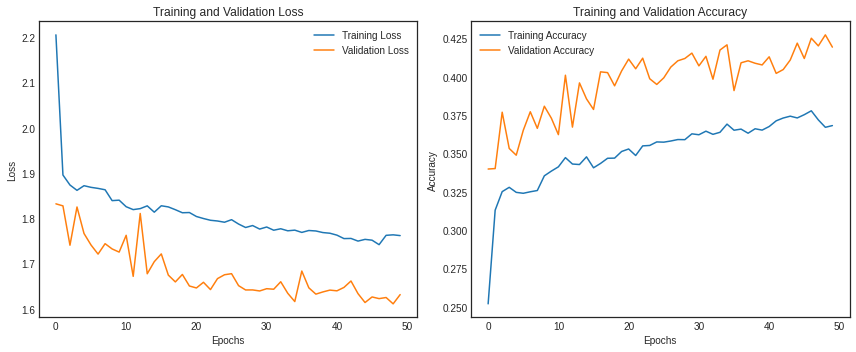

In [31]:
# 문제 3-5: 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

import matplotlib.pyplot as plt

# 손실 시각화 (Training loss & Validation loss)
plt.figure(figsize=(12, 5))

# 1. 손실(Loss) 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 2. 정확도(Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6262 - accuracy: 0.4140


[1.6262116432189941, 0.414000004529953]

회고 : 모델 성능 평가

손실 해석:
categorical_crossentropy 손실이 1.6262로 다소 높은 편이다. 
이것은 예측 확률 분포와 실제 레이블의 차이가 크다는 것을 의미한다. 
손실을 줄이기 위해 개선하기 위해 모델 구조를 개선하거나 하이퍼파라미터를 조정해야 한다.
 
정확도 해석:
랜덤으로 CIFAR-10의 이미지를 분류하는 경우 정확도는 약 10% 정도이다.
현재 모델의 정확도는 41.40%로서, 랜덤 예측보다 4배 정도 높은 성능을 보이지만 
CIFAR-10의 목표 정확도는 보통 70% 이상이므로, 성능을 개선할 필요가 있다.

과대적합 가능성이 있으므로 모델 개선 방안은 다음과 같다.
CNN 모델 사용: CIFAR-10 데이터셋은 이미지 데이터이므로, CNN 모델이 더 적합하다.
정규화 추가: BatchNormalization 및 L2 정규화를 추가하여 과대적합 방지를 유도한다.
하이퍼파라미터 조정: 학습률, 드롭아웃 비율, 배치 크기 등 하이퍼파라미터를 조정한다.